In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("test_df_en.csv", sep=';', index_col=0).reset_index().drop(columns='index')
df

,spotify_id,name,artist,position,genre_name,lyrics,language
0,3B7i9OKRRmIsSBHEbJz58Y,Grind With Me,Pretty Ricky,10.0,pop rap,"Ohh Ooh-oh, yeah Hey, hey, hey, yeah Baby, g...",en
1,0kPgn96FXEO9Bnz9QN1Tc0,We In Da City,Young Dro,18.0,pop rap,Yeah yeah Yeah yeah Yeah yeah Yeah yeah Young...,en
2,6Y9kdB2O0h9gq9y2vclsWT,Shorty Wanna Ride,Young Buck,22.0,pop rap,Shorty wanna ride with me (Ride with me) Shor...,en
3,0svl7cK07gK1ia5ainczU5,Break Ya Neck,Busta Rhymes,28.0,pop rap,"Yeah, check it out, see The only thing you ne...",en
4,1DFPibRb9RU3yfM3wOLdDT,Tru,Lloyd,32.0,pop rap,"I lost it all, my friends, my loved ones But ...",en
...,...,...,...,...,...,...,...
10301,35kAc40pbM9VpzQvnNMAZO,Raw Shit,Jaylib,102.0,east coast hip hop,"Uh Feel it (Yeah, yeah) Check it now What'd y...",en
10302,46ePNyvaDBKsxusDXDj7Wg,Wipeout,Fat Boys,114.0,east coast hip hop,"Hehehehehehee, wipeout Wiping out, wipeout W...",en
10303,6msTUCqIfVOWe7pzWGzh6F,Leaving the Past,Immortal Technique,118.0,east coast hip hop,"They told me I would never make it, I would n...",en
10304,5o7zlUWDdRlunP9S0OTm9R,Crumbs On the Table,D-Nice,123.0,east coast hip hop,"(Is that a turntable? Well get on it, it's you...",en


In [3]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Assurez-vous d'avoir téléchargé les ressources nécessaires
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def filter_adjectives_nouns(text):
    # Tokenize le texte
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text)
    
    # Supprime les mots vides (stopwords)
    words = [word.lower() for word in words if word.lower() not in stopwords.words('english')]
    
    # Part-of-speech tagging
    pos_tags = pos_tag(words)
    
    # Sélectionne les adjectifs et les noms communs
    adjectives_nouns = [word for word, pos in pos_tags if pos.startswith('NN') or pos.startswith('JJ')]
    
    return adjectives_nouns

# Exemple d'utilisation
text = "The quick brown fox jumps over the lazy dog"
filtered_words = filter_adjectives_nouns(text)
print(filtered_words)


['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
df["selected_words"] = df["lyrics"].apply(filter_adjectives_nouns)

In [55]:
df.to_csv("filtered_words_save.csv", sep=";")

In [5]:
genres = list(set(df["genre_name"]))
genres

['chamber pop',
 'rap rock',
 'rock en espanol',
 'pop punk',
 'bass trap',
 'dance rock',
 'metropopolis',
 'modern country rock',
 'disco',
 'trap music',
 'jazz blues',
 'dwn trap',
 'hip pop',
 'east coast hip hop',
 'new wave pop',
 'teen pop',
 'rap',
 'pixie',
 'house',
 'indie pop',
 'metal',
 'hardcore hip hop',
 'emo',
 'spanish pop',
 'new romantic',
 'neo mellow',
 'pop rap',
 'neo soul',
 'escape room',
 'rap metal',
 'brostep',
 'country',
 'quiet storm',
 'r&b',
 'soul',
 'folk-pop',
 'rock',
 'permanent wave',
 'urban contemporary',
 'acoustic pop',
 'mellow gold',
 'reggaeton',
 'hip hop',
 'vocal jazz',
 'soft rock',
 'europop',
 'metalcore',
 'gangster rap',
 'dance pop',
 'big room',
 'funk rock',
 'album rock',
 'funk',
 'screamo',
 'tropical house',
 'nu metal',
 'electronic trap',
 'progressive house',
 'latin alternative',
 'folk rock',
 'swedish pop',
 'new rave',
 'indie poptimism',
 'underground hip hop',
 'progressive electro house',
 'hard rock',
 'alternat

In [6]:
liste_dict = {}
for genre in genres :
    dicti = {}
    print("genre : ", genre)
    sub_df = df[df["genre_name"]==genre].reset_index()
    for i in range(len(sub_df)):
        for j in range(len(sub_df["selected_words"][i])) :
            if sub_df["selected_words"][i][j] not in dicti :
                dicti[sub_df["selected_words"][i][j]] = 1
            else :
                dicti[sub_df["selected_words"][i][j]] += 1
    liste_dict[genre] = dicti
    

genre :  chamber pop
genre :  rap rock
genre :  rock en espanol
genre :  pop punk
genre :  bass trap
genre :  dance rock
genre :  metropopolis
genre :  modern country rock
genre :  disco
genre :  trap music
genre :  jazz blues
genre :  dwn trap
genre :  hip pop
genre :  east coast hip hop
genre :  new wave pop
genre :  teen pop
genre :  rap
genre :  pixie
genre :  house
genre :  indie pop
genre :  metal
genre :  hardcore hip hop
genre :  emo
genre :  spanish pop
genre :  new romantic
genre :  neo mellow
genre :  pop rap
genre :  neo soul
genre :  escape room
genre :  rap metal
genre :  brostep
genre :  country
genre :  quiet storm
genre :  r&b
genre :  soul
genre :  folk-pop
genre :  rock
genre :  permanent wave
genre :  urban contemporary
genre :  acoustic pop
genre :  mellow gold
genre :  reggaeton
genre :  hip hop
genre :  vocal jazz
genre :  soft rock
genre :  europop
genre :  metalcore
genre :  gangster rap
genre :  dance pop
genre :  big room
genre :  funk rock
genre :  album roc

In [7]:
liste_totale = []
for dicti in liste_dict :
    
    for key in liste_dict[dicti] :
        liste_totale.append(key)
        
        
liste_unique = list(set(liste_totale))
len(liste_unique)

19456

In [9]:
import numpy as np
dict_vect = {}
for genre in genres :
    vecteur = np.zeros(len(liste_unique))
    for i in range(len(liste_unique)) :
        if liste_unique[i] in liste_dict[genre] :
            vecteur[i] = liste_dict[genre][liste_unique[i]]
    dict_vect[genre] = vecteur

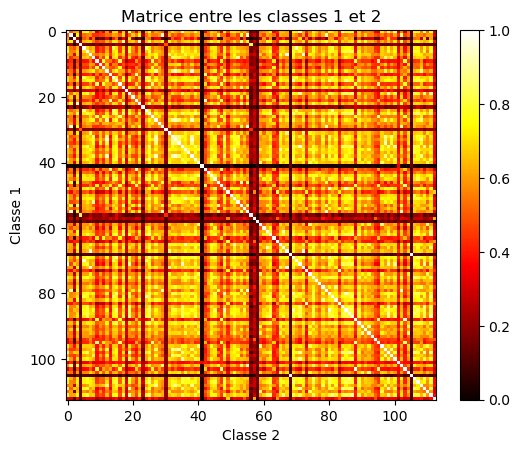

In [14]:
import matplotlib.pyplot as plt

def calcul_cos(vec1, vec2):
    cosinus_angle = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    return cosinus_angle


matrice = np.zeros((len(genres), len(genres)))
for i in range(len(genres)):
    for j in range(len(genres)):
        matrice[i][j] = calcul_cos(dict_vect[genres[i]], dict_vect[genres[j]])  # Par exemple, vous pouvez calculer la différence absolue ici



In [29]:
matrice[1][0]

0.49307665037920495

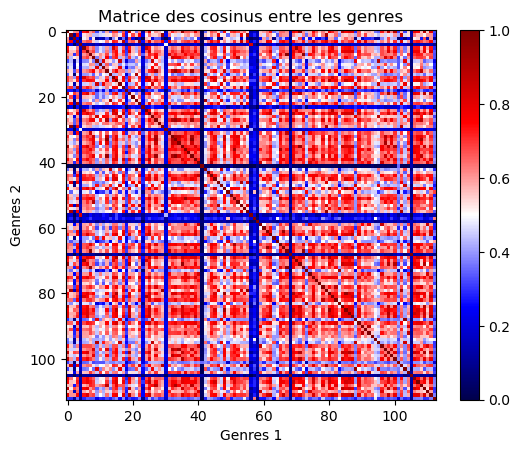

In [24]:
# Plot de la matrice
plt.imshow(matrice, cmap='seismic', interpolation='nearest')
plt.colorbar()
plt.title("Matrice des cosinus entre les genres")
plt.xlabel("Genres 1")
plt.ylabel("Genres 2")



#plt.xticks(np.arange(matrice.shape[1]), [genres[i] for i in range(matrice.shape[1]) if i%2==0])
#plt.yticks(np.arange(matrice.shape[0]), [genres[i] for i in range(matrice.shape[0]) if (i+1)%2==0 and i < 113])


plt.show()


In [52]:
variances = np.var(matrice, axis=1)
indices_15_plus_grandes_variances = np.argsort(variances)[::-1][:20]


plus_grandes_variances = variances[indices_15_plus_grandes_variances]
# Récupérer les labels correspondant aux 10 plus grandes variances
genres_15 = [genres[i] for i in indices_15_plus_grandes_variances]
genres_15

['indie folk',
 'indie rock',
 'rock en espanol',
 'indie pop',
 'neo-psychedelic',
 'chamber pop',
 'folk-pop',
 'pop',
 'shimmer pop',
 'quiet storm',
 'indietronica',
 'freak folk',
 'dance pop',
 'neo mellow',
 'garage rock',
 'post-teen pop',
 'synthpop',
 'metropopolis',
 'album rock',
 'urban contemporary']

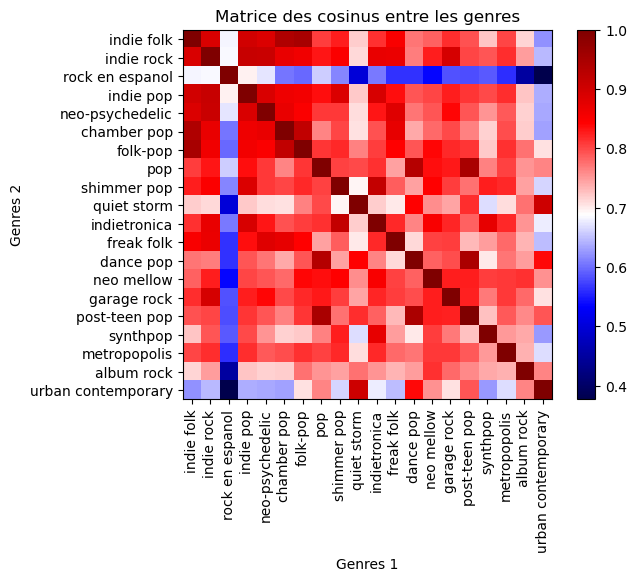

In [53]:
#sub_mtrx = matrice[:][indices_15_plus_grandes_variances]
#sub_mtrx = sub_mtrx[indices_15_plus_grandes_variances]

sub_mtrx = matrice[np.ix_(indices_15_plus_grandes_variances, indices_15_plus_grandes_variances)]
# Plot de la matrice
plt.imshow(sub_mtrx, cmap='seismic', interpolation='nearest')
plt.colorbar()
plt.title("Matrice des cosinus entre les genres")
plt.xlabel("Genres 1")
plt.ylabel("Genres 2")



plt.xticks(np.arange(sub_mtrx.shape[1]), [genres_15[i] for i in range(sub_mtrx.shape[1])], rotation=90)
plt.yticks(np.arange(sub_mtrx.shape[0]), [genres_15[i] for i in range(sub_mtrx.shape[0])])


plt.show()


In [100]:
sub_mtrx

array([[1.        , 0.88831516, 0.68291206, 0.89928194, 0.88671937,
        0.9411207 , 0.94893624, 0.80557995, 0.82614185, 0.71795582,
        0.81472836, 0.85104743, 0.77329775, 0.78571012, 0.81523982,
        0.79315768, 0.72308224, 0.80173067, 0.71279363, 0.62257589],
       [0.88831516, 1.        , 0.68378985, 0.91163566, 0.90846441,
        0.86998456, 0.86012547, 0.83022364, 0.84852322, 0.71142038,
        0.87012338, 0.86831839, 0.76848055, 0.82552745, 0.89527979,
        0.80087903, 0.79294936, 0.81504631, 0.74830087, 0.64509731],
       [0.68291206, 0.68378985, 1.        , 0.6975078 , 0.67351414,
        0.60482813, 0.59740799, 0.65885134, 0.61437761, 0.50060355,
        0.60671842, 0.56376053, 0.56411873, 0.53523743, 0.58227387,
        0.58127239, 0.58801215, 0.56072226, 0.45160989, 0.37686078],
       [0.89928194, 0.91163566, 0.6975078 , 1.        , 0.88810478,
        0.86265139, 0.85661243, 0.8367719 , 0.88779471, 0.72074347,
        0.89227143, 0.83466856, 0.79127406, 0

In [86]:
df_lda = pd.read_csv("lda_v1.csv", sep=',', index_col=0)
df_lda

,spotify_id,name,artist,position,genre_name,lyrics,language,selected,topic_distribution
0,3B7i9OKRRmIsSBHEbJz58Y,Grind With Me,Pretty Ricky,10.0,pop rap,"Ohh Ooh-oh, yeah Hey, hey, hey, yeah Baby, g...",en,"['baby', 'grind', 'relax', 'take', 'time', 'de...","[(1, 0.58197623), (2, 0.044897072), (3, 0.3423..."
1,0kPgn96FXEO9Bnz9QN1Tc0,We In Da City,Young Dro,18.0,pop rap,Yeah yeah Yeah yeah Yeah yeah Yeah yeah Young...,en,"['young', 'dro', 'turn', 'car', 'roof', 'car',...","[(2, 0.9937237)]"
2,6Y9kdB2O0h9gq9y2vclsWT,Shorty Wanna Ride,Young Buck,22.0,pop rap,Shorty wanna ride with me (Ride with me) Shor...,en,"['shorty', 'wanna', 'ride', 'shorty', 'wanna',...","[(2, 0.99731237)]"
3,0svl7cK07gK1ia5ainczU5,Break Ya Neck,Busta Rhymes,28.0,pop rap,"Yeah, check it out, see The only thing you ne...",en,"['see', 'thing', 'right', 'nod', 'fuckin', 'he...","[(2, 0.8050929), (3, 0.071661346), (4, 0.12183..."
4,1DFPibRb9RU3yfM3wOLdDT,Tru,Lloyd,32.0,pop rap,"I lost it all, my friends, my loved ones But ...",en,"['friends', 'ones', 'life', 'chance', 'grow', ...","[(1, 0.014604805), (2, 0.08044021), (3, 0.9011..."
...,...,...,...,...,...,...,...,...,...
10301,35kAc40pbM9VpzQvnNMAZO,Raw Shit,Jaylib,102.0,east coast hip hop,"Uh Feel it (Yeah, yeah) Check it now What'd y...",en,"['feel', 'check', 'come', 'c', 'c', 'kweli', '...","[(1, 0.16330288), (2, 0.7616119), (3, 0.0720665)]"
10302,46ePNyvaDBKsxusDXDj7Wg,Wipeout,Fat Boys,114.0,east coast hip hop,"Hehehehehehee, wipeout Wiping out, wipeout W...",en,"['hehehehehehee', 'wipeout', 'wah', 'wah', 'wa...","[(0, 0.99447477)]"
10303,6msTUCqIfVOWe7pzWGzh6F,Leaving the Past,Immortal Technique,118.0,east coast hip hop,"They told me I would never make it, I would n...",en,"['reality', 'nourishment', 'people', 'guess', ...","[(1, 0.8538106), (2, 0.12584715), (3, 0.018329..."
10304,5o7zlUWDdRlunP9S0OTm9R,Crumbs On the Table,D-Nice,123.0,east coast hip hop,"(Is that a turntable? Well get on it, it's you...",en,"['turntable', 'turn', 'chicken', 'egg', 'mc', ...","[(0, 0.054338306), (1, 0.06520732), (2, 0.7037..."


In [87]:
import ast
def attribuer_cluster(chaine) :
    chaine = chaine.replace("[", "").replace("]", "").replace("'", "").replace("),", ") , ")
    tuples = chaine.split(" , ")
    liste = []
    for i in range(len(tuples)):
        liste.append(ast.literal_eval(tuples[i]))
    max_score = 0
    max_indice = -1
    for tup in liste :
        if tup[1] > max_score :
            max_score = tup[1]
            max_indice = tup[0]
    
    return max_indice
    

In [88]:
df_lda["cluster"] = df_lda["topic_distribution"].apply(attribuer_cluster)
df_lda.to_csv("cluster_assigne.csv", sep=";", index=False)

In [89]:
df_lda

,spotify_id,name,artist,position,genre_name,lyrics,language,selected,topic_distribution,cluster
0,3B7i9OKRRmIsSBHEbJz58Y,Grind With Me,Pretty Ricky,10.0,pop rap,"Ohh Ooh-oh, yeah Hey, hey, hey, yeah Baby, g...",en,"['baby', 'grind', 'relax', 'take', 'time', 'de...","[(1, 0.58197623), (2, 0.044897072), (3, 0.3423...",1
1,0kPgn96FXEO9Bnz9QN1Tc0,We In Da City,Young Dro,18.0,pop rap,Yeah yeah Yeah yeah Yeah yeah Yeah yeah Young...,en,"['young', 'dro', 'turn', 'car', 'roof', 'car',...","[(2, 0.9937237)]",2
2,6Y9kdB2O0h9gq9y2vclsWT,Shorty Wanna Ride,Young Buck,22.0,pop rap,Shorty wanna ride with me (Ride with me) Shor...,en,"['shorty', 'wanna', 'ride', 'shorty', 'wanna',...","[(2, 0.99731237)]",2
3,0svl7cK07gK1ia5ainczU5,Break Ya Neck,Busta Rhymes,28.0,pop rap,"Yeah, check it out, see The only thing you ne...",en,"['see', 'thing', 'right', 'nod', 'fuckin', 'he...","[(2, 0.8050929), (3, 0.071661346), (4, 0.12183...",2
4,1DFPibRb9RU3yfM3wOLdDT,Tru,Lloyd,32.0,pop rap,"I lost it all, my friends, my loved ones But ...",en,"['friends', 'ones', 'life', 'chance', 'grow', ...","[(1, 0.014604805), (2, 0.08044021), (3, 0.9011...",3
...,...,...,...,...,...,...,...,...,...,...
10301,35kAc40pbM9VpzQvnNMAZO,Raw Shit,Jaylib,102.0,east coast hip hop,"Uh Feel it (Yeah, yeah) Check it now What'd y...",en,"['feel', 'check', 'come', 'c', 'c', 'kweli', '...","[(1, 0.16330288), (2, 0.7616119), (3, 0.0720665)]",2
10302,46ePNyvaDBKsxusDXDj7Wg,Wipeout,Fat Boys,114.0,east coast hip hop,"Hehehehehehee, wipeout Wiping out, wipeout W...",en,"['hehehehehehee', 'wipeout', 'wah', 'wah', 'wa...","[(0, 0.99447477)]",0
10303,6msTUCqIfVOWe7pzWGzh6F,Leaving the Past,Immortal Technique,118.0,east coast hip hop,"They told me I would never make it, I would n...",en,"['reality', 'nourishment', 'people', 'guess', ...","[(1, 0.8538106), (2, 0.12584715), (3, 0.018329...",1
10304,5o7zlUWDdRlunP9S0OTm9R,Crumbs On the Table,D-Nice,123.0,east coast hip hop,"(Is that a turntable? Well get on it, it's you...",en,"['turntable', 'turn', 'chicken', 'egg', 'mc', ...","[(0, 0.054338306), (1, 0.06520732), (2, 0.7037...",2


In [92]:
nb_cluster = len(list(set(df_lda["cluster"])))

df["cluster"] = df_lda["cluster"]

In [96]:
liste_matrice = []   ## UNE PAR CLUSTER
liste_genres = []
for i in range(nb_cluster):
    df_cluster = df[df["cluster"]==i]
    liste_dict = {}
    genres = list(set(df_cluster["genre_name"]))
    ## CREER LE DICT DES DICTS DE GENRE
    for genre in genres :
        dicti = {}
        sub_df = df_cluster[df_cluster["genre_name"]==genre].reset_index()
        for i in range(len(sub_df)):
            for j in range(len(sub_df["selected_words"][i])) :
                if sub_df["selected_words"][i][j] not in dicti :
                    dicti[sub_df["selected_words"][i][j]] = 1
                else :
                    dicti[sub_df["selected_words"][i][j]] += 1
        liste_dict[genre] = dicti
    ## RECUPERER MOTS UNIQUES
    liste_totale = []
    for dicti in liste_dict :
        for key in liste_dict[dicti] :
            liste_totale.append(key)
    liste_unique = list(set(liste_totale))
    ## UN DICTIONNAIRE DE VECTEUR PAR GENRE
    dict_vect = {}
    for genre in genres :
        vecteur = np.zeros(len(liste_unique))
        for i in range(len(liste_unique)) :
            if liste_unique[i] in liste_dict[genre] :
                vecteur[i] = liste_dict[genre][liste_unique[i]]
        dict_vect[genre] = vecteur
    ## CREER MATRICE DES COSINUS
    matrice = np.zeros((len(genres), len(genres)))
    for i in range(len(genres)):
        for j in range(len(genres)):
            matrice[i][j] = calcul_cos(dict_vect[genres[i]], dict_vect[genres[j]])  # Par exemple, vous pouvez calculer la différence absolue ici
    liste_matrice.append(matrice)
    liste_genres.append(genres)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_16944\1001167877.py:4: RuntimeWarning: invalid value encountered in scalar divide
  cosinus_angle = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))


In [101]:
matrice

array([[1.        , 0.06679395, 0.10188178, ..., 0.14731706, 0.65979664,
        0.04497662],
       [0.06679395, 1.        , 0.18383187, ..., 0.13835378, 0.056091  ,
        0.17887827],
       [0.10188178, 0.18383187, 1.        , ..., 0.11658649, 0.17424763,
        0.11419825],
       ...,
       [0.14731706, 0.13835378, 0.11658649, ..., 1.        , 0.16022165,
        0.05884859],
       [0.65979664, 0.056091  , 0.17424763, ..., 0.16022165, 1.        ,
        0.28123462],
       [0.04497662, 0.17887827, 0.11419825, ..., 0.05884859, 0.28123462,
        1.        ]])

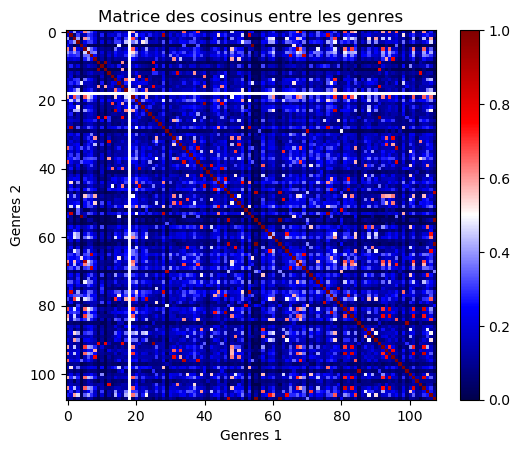

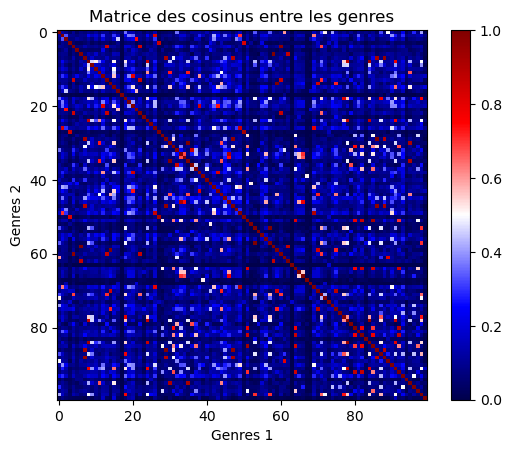

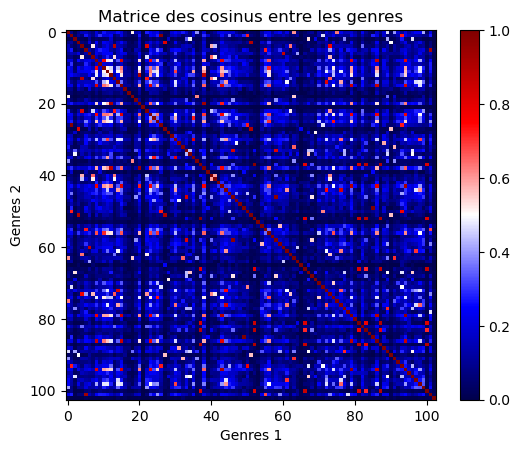

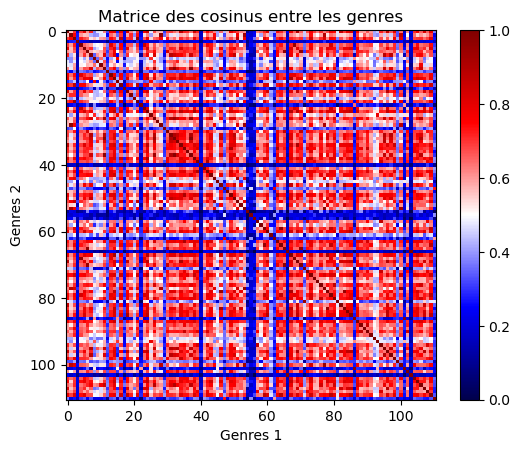

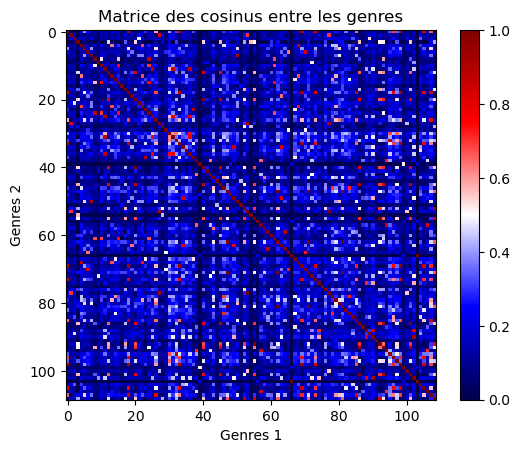

In [104]:
for i in range(len(liste_matrice)):
    plt.imshow(liste_matrice[i], cmap='seismic', interpolation='nearest')
    plt.colorbar()
    plt.title("Matrice des cosinus entre les genres")
    plt.xlabel("Genres 1")
    plt.ylabel("Genres 2")
    #plt.xticks(np.arange(liste_matrice[i].shape[1]), [liste_genres[i][j] for j in range(liste_matrice[i].shape[1])])
    #plt.yticks(np.arange(liste_matrice[i].shape[0]), [liste_genres[i][j] for j in range(liste_matrice[i].shape[0])])
    plt.show()



In [134]:
def obtenir_X_pct_genres(df, rate):
    nb_total = len(df)
    count_group = df.groupby('genre_name').count()
    serie = count_group["name"]
    dictio = {}
    for i in range(len(serie)):
        dictio[serie.index[i]] = serie.iloc[i]
    sum_cum = 0
    genre_added = []
    while sum_cum < rate*nb_total :
        # Ajouter le max 
        max_key = "nul"
        max_val = 0
        for key in dictio :
            if dictio[key] > max_val and key not in genre_added :
                max_key = key
                max_val = dictio[key]
        genre_added.append(max_key)
        sum_cum+=max_val
        
        
    return genre_added

In [135]:
### MEME GROS CODE PAR CLUSTER + REDUCTION A 90% DES GENRES DU CLUSTER

liste_matrice = []   ## UNE PAR CLUSTER
liste_genres = []
for i in range(nb_cluster):
    df_cluster = df[df["cluster"]==i]
    liste_dict = {}
    #genres = list(set(df_cluster["genre_name"]))  # <----- LIGNE QUI CHANGE
    genres = obtenir_X_pct_genres(df_cluster, 0.8)
    ## CREER LE DICT DES DICTS DE GENRE
    for genre in genres :
        dicti = {}
        sub_df = df_cluster[df_cluster["genre_name"]==genre].reset_index()
        for i in range(len(sub_df)):
            for j in range(len(sub_df["selected_words"][i])) :
                if sub_df["selected_words"][i][j] not in dicti :
                    dicti[sub_df["selected_words"][i][j]] = 1
                else :
                    dicti[sub_df["selected_words"][i][j]] += 1
        liste_dict[genre] = dicti
    ## RECUPERER MOTS UNIQUES
    liste_totale = []
    for dicti in liste_dict :
        for key in liste_dict[dicti] :
            liste_totale.append(key)
    liste_unique = list(set(liste_totale))
    ## UN DICTIONNAIRE DE VECTEUR PAR GENRE
    dict_vect = {}
    for genre in genres :
        vecteur = np.zeros(len(liste_unique))
        for i in range(len(liste_unique)) :
            if liste_unique[i] in liste_dict[genre] :
                vecteur[i] = liste_dict[genre][liste_unique[i]]
        dict_vect[genre] = vecteur
    ## CREER MATRICE DES COSINUS
    matrice = np.zeros((len(genres), len(genres)))
    for i in range(len(genres)):
        for j in range(len(genres)):
            matrice[i][j] = calcul_cos(dict_vect[genres[i]], dict_vect[genres[j]])  # Par exemple, vous pouvez calculer la différence absolue ici
    liste_matrice.append(matrice)
    liste_genres.append(genres)

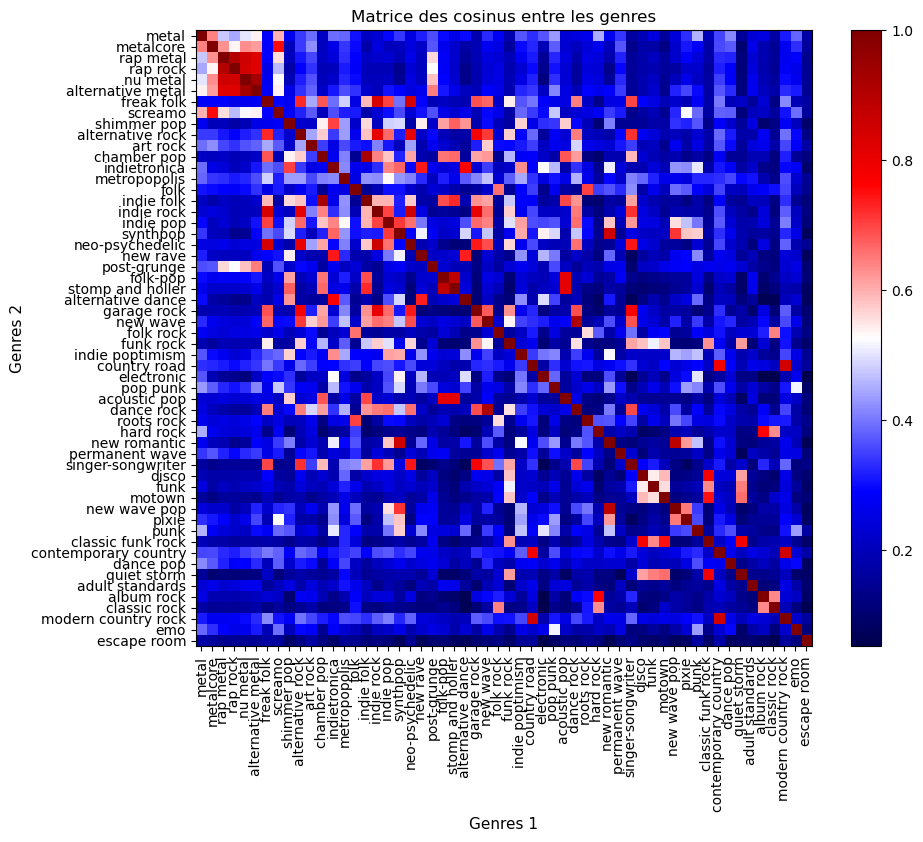

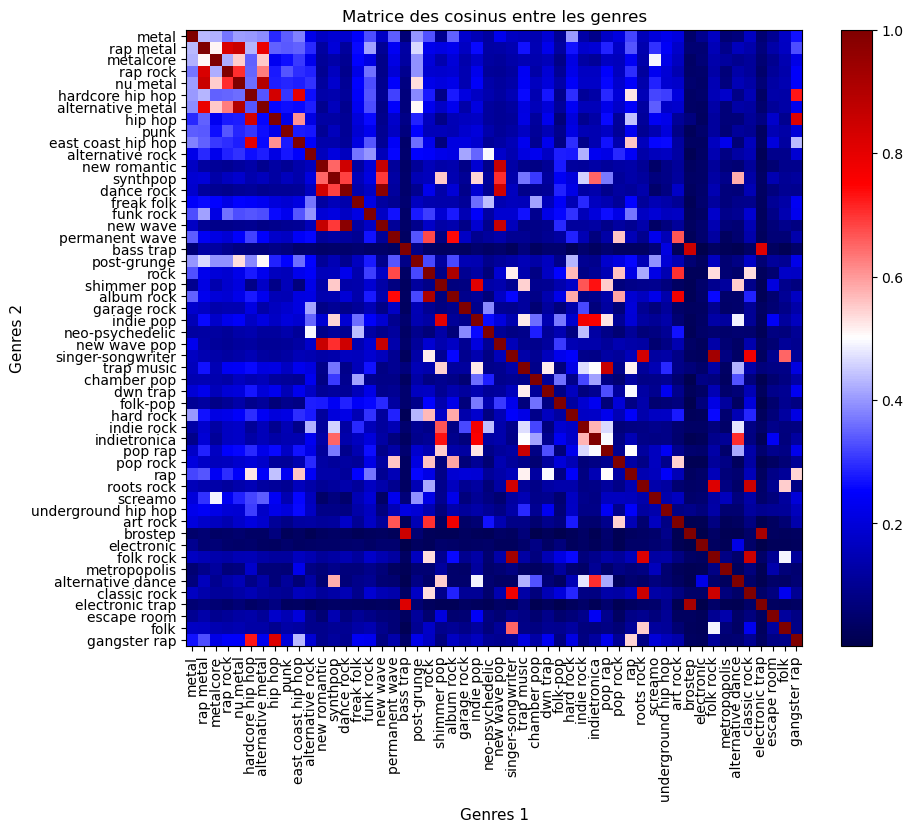

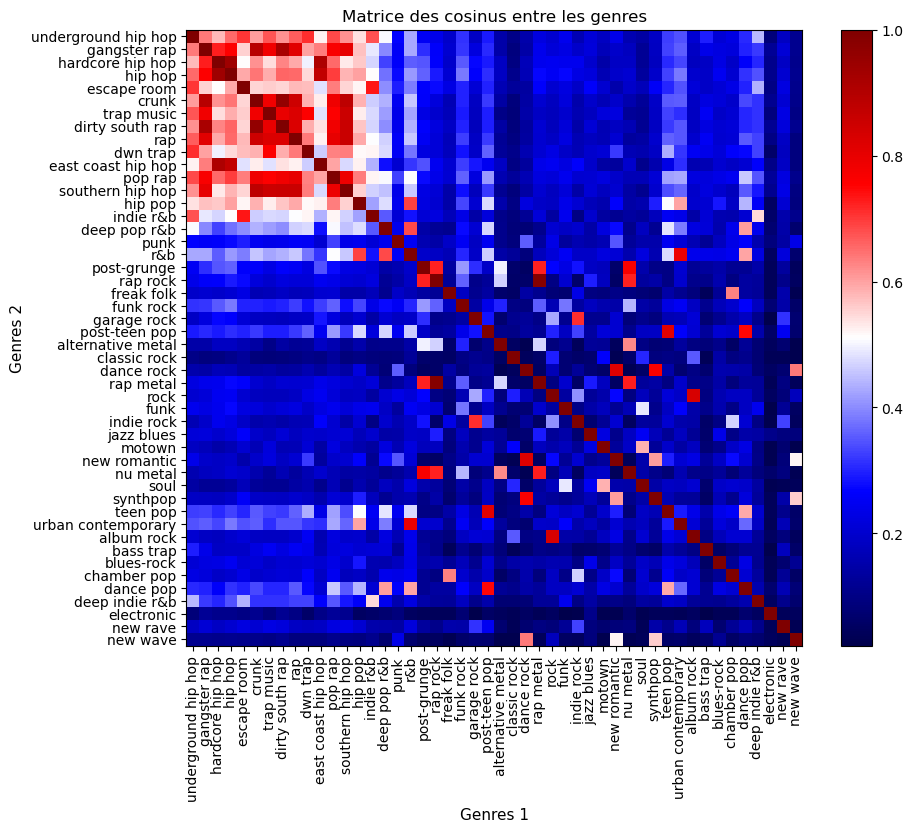

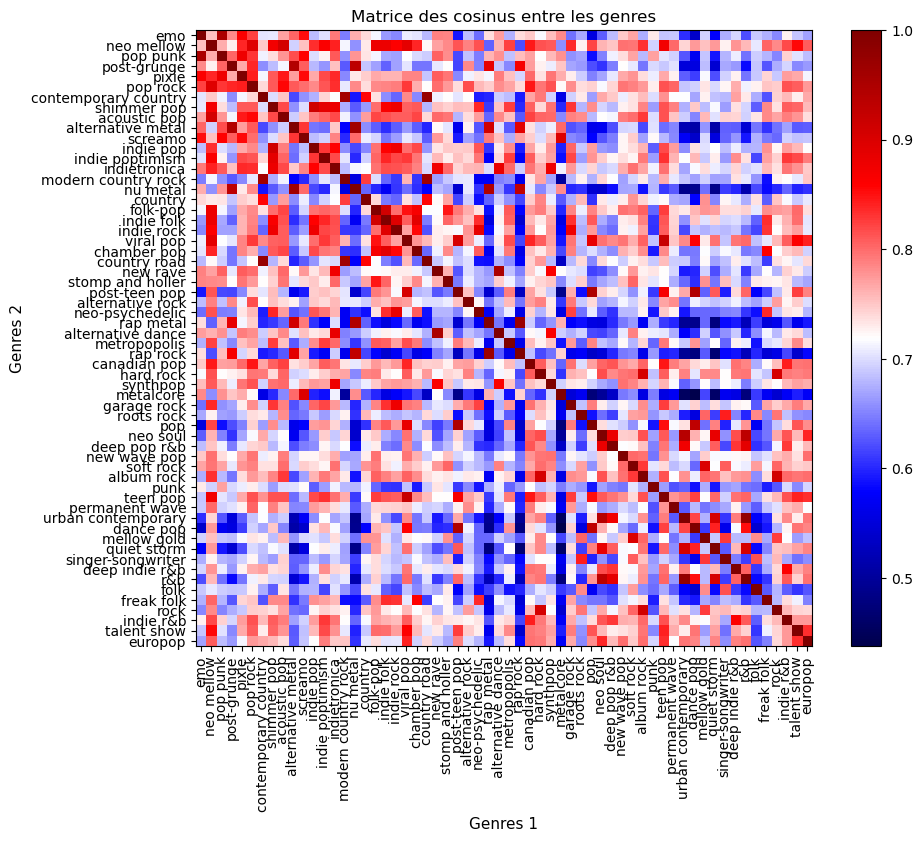

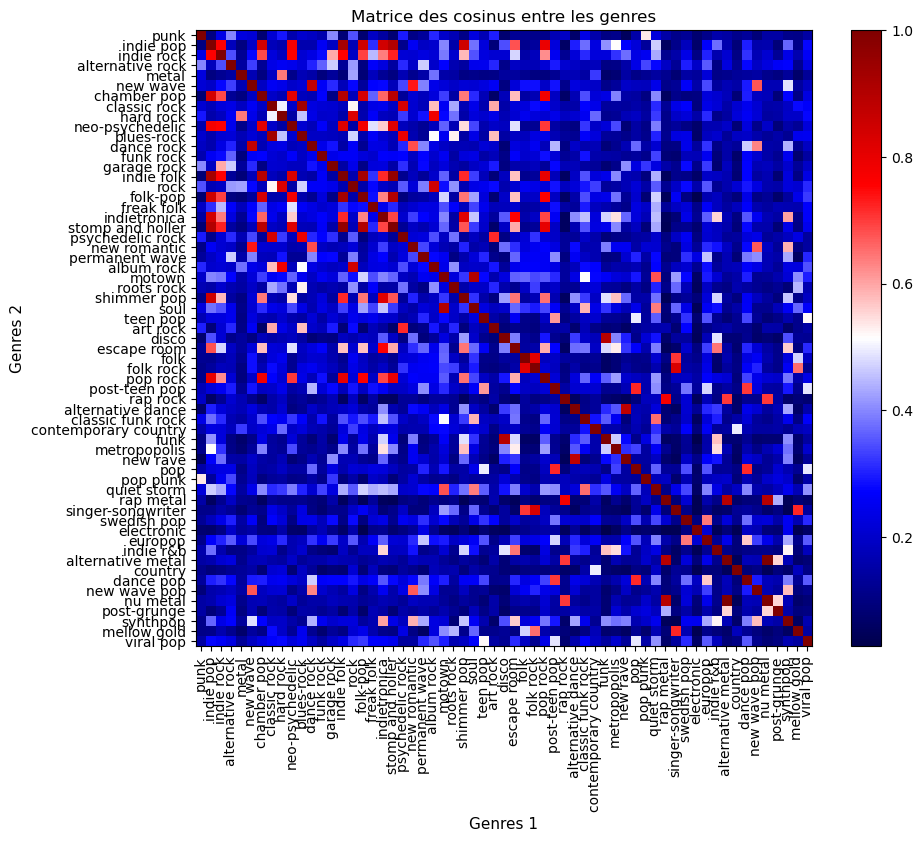

In [140]:
for i in range(len(liste_matrice)):
    plt.figure(figsize=(10, 8)) 

    
    plt.imshow(liste_matrice[i], cmap='seismic', interpolation='nearest')
    plt.colorbar()
    plt.title("Matrice des cosinus entre les genres")
    plt.xlabel("Genres 1", fontsize=11)
    plt.ylabel("Genres 2", fontsize=11)
    plt.xticks(np.arange(liste_matrice[i].shape[1]), [liste_genres[i][j] for j in range(liste_matrice[i].shape[1])], rotation=90)
    plt.yticks(np.arange(liste_matrice[i].shape[0]), [liste_genres[i][j] for j in range(liste_matrice[i].shape[0])])
    plt.show()